In [47]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt

# from google.colab import drive

In [48]:
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
torch.manual_seed(321)

# 이미지 크기를 128 x 128 로 조정합니다
IMAGE_SIZE = 128

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
  torch.cuda.manual_seed_all(321)

In [50]:
original_dataset=ImageFolder(root='/content/gdrive/MyDrive/flower_photos/',
                             transform=transforms.Compose([
                               transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                               transforms.ToTensor()
                             ]))

In [51]:
original_loader = DataLoader(original_dataset, # 이전에 생성한 original_dataset를 로드 합니다.
                             batch_size=2318,  #2318,    # 배치사이즈
                             shuffle=True,     # 셔플 여부
                             num_workers=1
                            )

In [52]:
# 전체 이미지를 추출한다.
original_images, labels = next(iter(original_loader))

# 이미지의 shape을 확인합니다. 224 X 224 RGB 이미지 임을 확인합니다.
# (batch_size, channel, height, width)
print(original_images.shape)

torch.Size([2313, 3, 128, 128])


In [53]:
X=original_images
Y=labels

In [54]:
labels

tensor([4, 3, 4,  ..., 3, 3, 0])

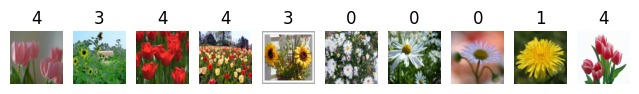

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.title(labels[i].item())
  plt.imshow(original_images[i].permute(1,2,0)) #[chanel,row,col]=>[row,col,chanel]
  plt.axis('off')
plt.savefig('/content/gdrive/MyDrive/data/img[%d].png'%(i))
plt.show()

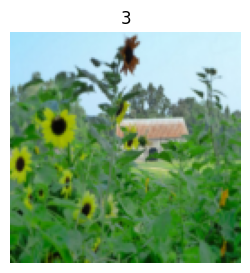

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))

plt.title(labels[1].item())
plt.imshow(original_images[1].permute(1,2,0)) #[chanel,row,col]=>[row,col,chanel]
plt.axis('off')
plt.savefig('/content/gdrive/MyDrive/data/img[%d].png'%(1))
plt.show()

In [57]:
image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

transform_dataset=ImageFolder(root='/content/gdrive/MyDrive/flower_photos',
                              transform=image_transform)

transform_loader = DataLoader(transform_dataset, # 이전에 생성한 transform_dataset를 적용합니다.
                              batch_size=10,     # 배치사이즈
                              shuffle=False,      # 셔플 여부
                              num_workers=1
                             )


In [58]:
transform_images, labels = next(iter(transform_loader))

In [59]:
print(transform_images.shape, labels.shape)
X1=torch.cat([X, transform_images], dim=0)
Y1=torch.cat([Y, labels])
print(X1.shape, Y1.shape)

torch.Size([10, 3, 128, 128]) torch.Size([10])
torch.Size([2323, 3, 128, 128]) torch.Size([2323])


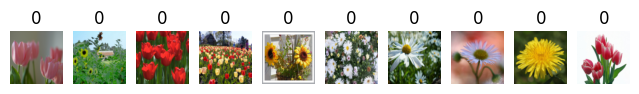

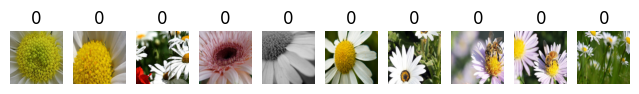

In [60]:
plt.figure(figsize=(8,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.title(labels[i].item())
  plt.imshow(original_images[i].permute(1,2,0)) #[chanel,row,col]=>[row,col,chanel]
  plt.axis('off')
plt.show()
plt.figure(figsize=(8,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.title(labels[i].item())
  plt.imshow(transform_images[i].permute(1,2,0)) #[chanel,row,col]=>[row,col,chanel]
  plt.axis('off')
plt.show()

In [79]:
def create_loader(transform):
  transform_dataset=ImageFolder(root='/content/gdrive/MyDrive/flower_photos',
                                # 다운로드 받은 폴더의 root 경로를 지정합니다.
                                transform=transform)

  transform_loader=DataLoader(transform_dataset,
                              batch_size=1000,
                              shuffle=True,
                              num_workers=1)

  transform_images, labels=next(iter(transform_loader))

  fig, axes=plt.subplots(3,2)
  fig.set_size_inches(4,6)

  for idx in range(3):
    axes[idx, 0].imshow(original_images[idx].permute(1,2,0))
    axes[idx, 0].set_axis_off()
    axes[idx, 0].set_title('Original')
    axes[idx, 1].imshow(transform_images[idx].permute(1,2,0))
    axes[idx, 1].set_axis_off()
    axes[idx, 1].set_title('Transform')
  plt.show()
  return transform_images, labels

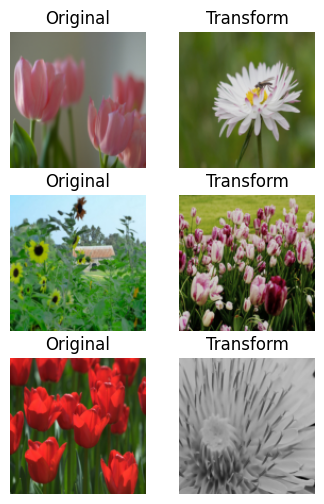

torch.Size([3323, 3, 128, 128]) torch.Size([3323])


In [80]:
image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # colorJitter 적용
    transforms.ColorJitter(brightness=(0.7,0.9),
                           contrast=(1,1),
                           saturation=(0.7, 0.9),
                           #hue=(-0.2, 0.2)
                           ),
    transforms.ToTensor()
])
color_tf_images, color_tf_labels=create_loader(image_transform)

X2=torch.cat([X1, color_tf_images], dim=0)
Y2=torch.cat([Y1, color_tf_labels], dim=0)
print(X2.size(), Y2.size())

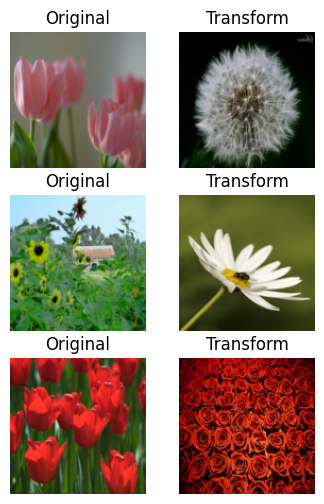

torch.Size([4323, 3, 128, 128]) torch.Size([4323])


In [81]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.ToTensor()
])

flip_tf_images, flip_tf_labels=create_loader(image_transform)
X3=torch.cat([X2, flip_tf_images], dim=0)
Y3=torch.cat([Y2, flip_tf_labels], dim=0)
print(X3.size(), Y3.size())

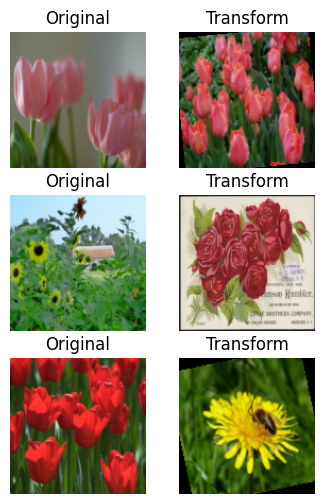

torch.Size([5323, 3, 128, 128]) torch.Size([5323])


In [82]:
image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-15, 15),
                              interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

rot_tf_images, rot_tf_labels=create_loader(image_transform)
X4=torch.cat([X3, rot_tf_images], dim=0)
Y4=torch.cat([Y3, rot_tf_labels], dim=0)
print(X4.size(), Y4.size())

In [83]:
# image_transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     # GaussianBlur 적용
#     transforms.GaussianBlur(kernel_size=(3, 3), sigma=(1.0, 2.0)),
#     transforms.ToTensor()
# ])

# GB_tf_images, GB_tf_labels=create_loader(image_transform)
# X5=torch.cat([X4, GB_tf_images], dim=0)
# Y5=torch.cat([Y4, GB_tf_labels], dim=0)
# print(X5.size(), Y5.size())

In [84]:
# image_transform = transforms.Compose([
#     transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#     # RandomAdjustSharpness 적용
#     transforms.RandomAdjustSharpness(sharpness_factor=0.5, p=0.9),
#     transforms.ToTensor()
# ])

# sp_tf_images, sp_tf_labels=create_loader(image_transform)
# X6=torch.cat([X5, sp_tf_images], dim=0)
# Y6=torch.cat([Y5, sp_tf_labels], dim=0)
# print(X6.size(), Y6.size())

In [85]:
cnt0=(Y4==0).sum()
cnt1=(Y4==1).sum()
cnt2=(Y4==2).sum()
cnt3=(Y4==3).sum()
cnt4=(Y4==4).sum()
print(cnt0, cnt1, cnt2, cnt3, cnt4)

tensor(920) tensor(1313) tensor(995) tensor(1165) tensor(930)


In [86]:
ratios=[.8, .2]
train_cnt = int(X4.size(0) * ratios[0])
test_cnt = int(X4.size(0) * ratios[1])
cnts = [train_cnt, test_cnt]
print("Train %d / Test %d samples." % (train_cnt, test_cnt))

Train 4258 / Test 1064 samples.


In [87]:
indices=torch.randperm(X4.size(0))
#print(torch.randperm(10))

In [88]:
x=torch.index_select(X4, dim=0, index=indices)
y=torch.index_select(Y4, dim=0, index=indices)

In [89]:
x_train=x[:cnts[0]]
x_test=x[cnts[0]:]
y_train=y[:cnts[0]]
y_test=y[cnts[0]:]
print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())


torch.Size([4258, 3, 128, 128]) torch.Size([4258])
torch.Size([1065, 3, 128, 128]) torch.Size([1065])


In [90]:
train_dataset=TensorDataset(x_train, y_train)
test_dataset=TensorDataset(x_test, y_test)

In [91]:
train_loader=DataLoader(train_dataset,
                        batch_size=100,
                        shuffle=True)
test_loader=DataLoader(test_dataset)

In [93]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1=nn.Conv2d(  #128*128
        in_channels=3,
        out_channels=8,
        kernel_size=3,
        padding=1
    )
    self.conv2=nn.Conv2d(
        in_channels=8,
        out_channels=16,
        kernel_size=3,
        padding=1
    )
    self.conv3=nn.Conv2d(
        in_channels=16,
        out_channels=32,
        kernel_size=3,
        padding=1
    )
    self.conv4=nn.Conv2d(
        in_channels=32,
        out_channels=64,
        kernel_size=3,
        padding=1
    )
    self.pool=nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc1=nn.Linear(8*8*64, 128)
    self.fc2=nn.Linear(128, 64)
    self.fc3=nn.Linear(64, 5)

  def forward(self, x): #[3, 128, 128]
    x=self.conv1(x)
    x=torch.relu(x)
    x=self.pool(x)  #[8, 64, 64]
    x=self.conv2(x)
    x=torch.relu(x)
    x=self.pool(x) #[16, 32,32]
    x=self.conv3(x)
    x=torch.relu(x)
    x=self.pool(x) #[32, 16,16]
    x=self.conv4(x)
    x=torch.relu(x)
    x=self.pool(x)  #[64, 8, 8]

    x=x.view(-1, 8*8*64)
    x=self.fc1(x)
    x=self.fc2(x)
    x=self.fc3(x)
    x=torch.log_softmax(x, dim=1)
    return x

In [94]:
device= torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = CNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [95]:
def train(model, train_loader, optimizer,log_interval):
  model.train()
  for batch_index, (image, label) in enumerate(train_loader):
    image=image.to(device)
    label=label.to(device)

    optimizer.zero_grad()
    y_hat=model(image)
    loss=criterion(y_hat, label)
    loss.backward()
    optimizer.step()

    if batch_index % log_interval==0:
      print('train Epoch:{}, {}, Train Loss:{}'.format(
          Epoch, [(batch_index * len(image))/len(train_loader.dataset)],
          loss.item()
      ))

In [104]:
def evaluate(model, test_loader):
  model.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for image, label in test_loader:
      image=image.to(device)
      label=label.to(device)
      y_hat=model(image)
      test_loss+=criterion(y_hat, label).item()
      prediction=y_hat.argmax(dim=1)
      correct+=(prediction==label).sum()

  test_loss=test_loss/len(test_loader.dataset)
  test_accuracy=correct/len(test_loader.dataset)*100
  return test_loss, test_accuracy

In [105]:
EPOCHS = 10
for Epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval=100)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print(f"\n[EPOCH: {Epoch}]\tTest Loss: {test_loss:.4f}\tTest Accuracy: {test_accuracy} % \n")

train Epoch:1, [0.0], Train Loss:0.7244567275047302

[EPOCH: 1]	Test Loss: 0.6491	Test Accuracy: 75.96244049072266 % 

train Epoch:2, [0.0], Train Loss:0.472255140542984

[EPOCH: 2]	Test Loss: 0.6447	Test Accuracy: 74.17840576171875 % 

train Epoch:3, [0.0], Train Loss:0.5351119041442871

[EPOCH: 3]	Test Loss: 0.6082	Test Accuracy: 78.6854476928711 % 

train Epoch:4, [0.0], Train Loss:0.5109308362007141

[EPOCH: 4]	Test Loss: 0.5583	Test Accuracy: 79.34272003173828 % 

train Epoch:5, [0.0], Train Loss:0.2898781895637512

[EPOCH: 5]	Test Loss: 0.5441	Test Accuracy: 79.06103515625 % 

train Epoch:6, [0.0], Train Loss:0.2640838325023651

[EPOCH: 6]	Test Loss: 0.5256	Test Accuracy: 81.59624481201172 % 

train Epoch:7, [0.0], Train Loss:0.34883353114128113

[EPOCH: 7]	Test Loss: 0.5069	Test Accuracy: 82.25352478027344 % 

train Epoch:8, [0.0], Train Loss:0.17082466185092926

[EPOCH: 8]	Test Loss: 0.4638	Test Accuracy: 83.84976959228516 % 

train Epoch:9, [0.0], Train Loss:0.2356128692626953

In [106]:
path='/content/gdrive/MyDrive/model.pt'
torch.save(model.state_dict(), path)

In [107]:
model2=CNN().to(device)
model2.load_state_dict(torch.load(path))
model2.eval()

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [108]:

predict=model2(x_test[0].to(device)).argmax(dim=1)
print(predict.item(), y_test[0].item())

3 3


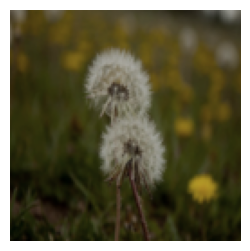

In [109]:
plt.figure(figsize=(3, 3))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(x_test[3].permute(1, 2, 0))
plt.axis('off')
plt.show()
